In [13]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

In [18]:
os.chdir('C:/Users/POZOLE/Documents/pp/nohtyp/practice_algo_trading/datos_master')
data = pd.read_csv('datos_sup_multiclase copy.csv')

# Cargar los datos
df = data.copy()


In [19]:
import ta

# Suponiendo que ya tienes un DataFrame `df` con las columnas 'open', 'high', 'low', 'close', 'volume'

# Calcular el RSI
df['rsi'] = ta.momentum.RSIIndicator(df['close'], window=14).rsi()

# Calcular el Estocástico
df['stoch'] = ta.momentum.StochasticOscillator(df['high'], df['low'], df['close'], window=14, smooth_window=3).stoch()

williams_r_indicator = ta.momentum.WilliamsRIndicator(df['high'], df['low'], df['close'])
df['williams_r'] = williams_r_indicator.williams_r()

# Calcular el MFI
df['mfi'] = ta.volume.MFIIndicator(df['high'], df['low'], df['close'], df['volume'], window=14).money_flow_index()


# Calcular Aroon Up y Aroon Down
aroon_indicator = ta.trend.AroonIndicator(df['high'], df['low'], window=14)
df['aroon_up'], df['aroon_down'] = aroon_indicator.aroon_up(), aroon_indicator.aroon_down()

# Calcular el CMF
df['cmf'] = ta.volume.ChaikinMoneyFlowIndicator(df['high'], df['low'], df['close'], df['volume'], window=20).chaikin_money_flow()


# Calcular Stochastic RSI
stoch_rsi_indicator = ta.momentum.rsi(df['close'], window=14)
df['stoch_rsi'] = stoch_rsi_indicator

# Calcular el CCI
df['cci'] = ta.trend.CCIIndicator(df['high'], df['low'], df['close'], window=14).cci()



In [58]:
# Definir las columnas predictoras y la variable objetivo
#features = ['rsi', 'adp', 'adm', 'dri', 'dlogri']

#features = ['rsi', 'stoch', 'williams_r', 'mfi', 'aroon_up', 'aroon_down', 'cmf', 'stoch_rsi', 'cci', 'macd', 'adx', 'adp', 'adm', 'dri', 'dlogri', 'avgtr', 'donch_hband', 'donch_lband', 'vwap']

features = ['williams_r', 'cci', 'dri', 'dlogri']

df = df.dropna()

#features = ['rsi', 'stoch', 'williams_r', 'mfi', 'aroon_up', 'aroon_down', 'cmf', 'stoch_rsi', 'cci']

target = 'signal'


# Separar variables predictoras y objetivo
X = df[features]
y = df[target]

# Dividir en conjunto de entrenamiento y prueba (con estratificación)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Aplicar PCA para reducción de dimensionalidad
n_features = X_train.shape[1]  # Obtener el número de características
pca = PCA(n_components=min(10, n_features), random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Definir y entrenar el modelo XGBoost
clf = XGBClassifier(n_estimators=500, random_state=42, objective='multi:softmax', num_class=3)  # num_class debe ser 3 para 3 clases
clf.fit(X_train_pca, y_train)

# Realizar predicciones
y_pred = clf.predict(X_test_pca)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))



Accuracy: 0.7655
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       685
           1       0.45      0.33      0.38        93
           2       0.40      0.25      0.31        92

    accuracy                           0.77       870
   macro avg       0.56      0.49      0.52       870
weighted avg       0.74      0.77      0.75       870



In [59]:
# Ahora probemos con nuevos datos ajenos al modelo para ver como se desempeña

os.chdir('C:/Users/POZOLE/Documents/pp/nohtyp/practice_algo_trading/modelos_dummys_ver5.0')
data_2 = pd.read_csv('datos_sol.csv')

# Cargar los datos
df_2 = data_2.copy()

In [60]:
import ta

# Suponiendo que ya tienes un DataFrame `df_2` con las columnas 'open', 'high', 'low', 'close', 'volume'

# Calcular el RSI
df_2['rsi'] = ta.momentum.RSIIndicator(df_2['close'], window=14).rsi()

# Calcular el Estocástico
df_2['stoch'] = ta.momentum.StochasticOscillator(df_2['high'], df_2['low'], df_2['close'], window=14, smooth_window=3).stoch()

williams_r_indicator = ta.momentum.WilliamsRIndicator(df_2['high'], df_2['low'], df_2['close'])
df_2['williams_r'] = williams_r_indicator.williams_r()

# Calcular el MFI
df_2['mfi'] = ta.volume.MFIIndicator(df_2['high'], df_2['low'], df_2['close'], df_2['volume'], window=14).money_flow_index()

# Calcular Aroon Up y Aroon Down
aroon_indicator = ta.trend.AroonIndicator(df_2['high'], df_2['low'], window=14)
df_2['aroon_up'], df_2['aroon_down'] = aroon_indicator.aroon_up(), aroon_indicator.aroon_down()

# Calcular el CMF
df_2['cmf'] = ta.volume.ChaikinMoneyFlowIndicator(df_2['high'], df_2['low'], df_2['close'], df_2['volume'], window=20).chaikin_money_flow()

# Calcular Stochastic RSI
stoch_rsi_indicator = ta.momentum.rsi(df_2['close'], window=14)
df_2['stoch_rsi'] = stoch_rsi_indicator

# Calcular el CCI
df_2['cci'] = ta.trend.CCIIndicator(df_2['high'], df_2['low'], df_2['close'], window=14).cci()


In [61]:
# Realizar las predicciones sobre todos los datos nuevos
df_2 = df_2.dropna()
X_sol = df_2[features]
predicciones_validacion = clf.predict(X_sol)

# Agregar las predicciones como una nueva columna en el DataFrame
df_2['preds'] = predicciones_validacion


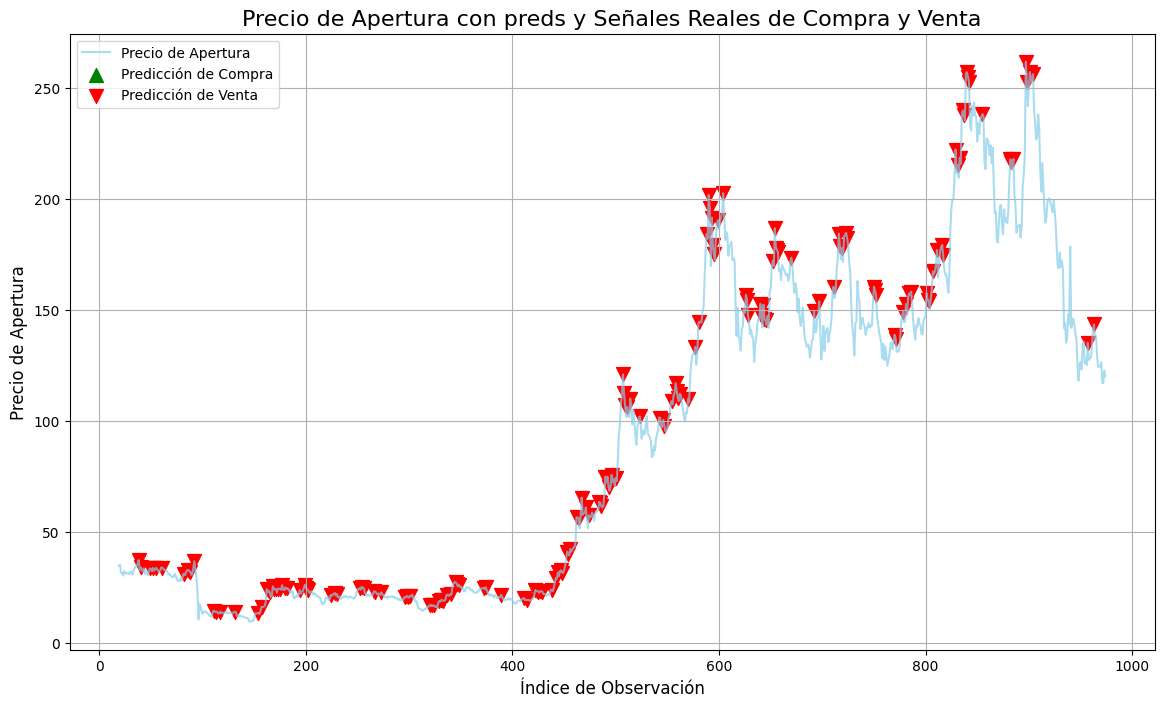

In [62]:
import matplotlib.pyplot as plt

# Crear gráfico de precios
plt.figure(figsize=(14, 8))
plt.plot(df_2['open'], label='Precio de Apertura', color='skyblue', alpha=0.7)

# Añadir señales de predicción de compra y venta
plt.scatter(df_2.index[df_2['preds'] == 1], df_2['open'][df_2['preds'] == 1], 
            marker='^', color='green', label='Predicción de Compra', alpha=1, s=100)
plt.scatter(df_2.index[df_2['preds'] == 2], df_2['open'][df_2['preds'] == 2], 
            marker='v', color='red', label='Predicción de Venta', alpha=1, s=100)


# Personalización del gráfico
plt.title('Precio de Apertura con preds y Señales Reales de Compra y Venta', fontsize=16)
plt.xlabel('Índice de Observación', fontsize=12)
plt.ylabel('Precio de Apertura', fontsize=12)
plt.legend(loc='best')
plt.grid(True)

# Mostrar gráfico
plt.show()
